In [14]:
#import programs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# to import the raw data into pandas
SFOEMS = pd.read_csv('EMS_SFO_Data.csv', header=0)
SFOEMS.head()


,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,EMSUnits,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,0,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,0,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,0,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market


In [16]:
SFOEMS.dtypes

Address                             object
IncidentDate                        object
Incident day                        object
AlarmDt                             object
Alarm day                           object
AlarmTm                             object
ArrivalDt                           object
ArrivalTm                           object
CloseDt                             object
CloseTm                             object
Difference between arrival time     object
Zipcode                              int64
Battalion                           object
StationArea                        float64
SuppressionUnits                     int64
SuppressionPersonnel                 int64
EMSUnits                             int64
EMSPersonnel                         int64
OtherUnits                           int64
OtherPersonnel                       int64
Primary                              int64
Category                            object
PrimarySituation                    object
MutualAid  

In [17]:
# extract month from Indcident Date column and add month column
SFOEMS['month'] = pd.DatetimeIndex(SFOEMS['IncidentDate']).month
SFOEMS.head()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market,1
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,1
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,1
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1


In [25]:
#To create a dictionary of month to seasons
season = {'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer', 'Jul': 'Summer', 'Aug':
          'Summer', 'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'}
print(season)

{'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'}


In [26]:
#To add season column to df using append
SFOEMS['Season']=SFOEMS['month'].map(season)
SFOEMS.tail(25)

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Season
63504,350 Arballo Drive,12/31/2017,Sunday,12/31/2017,Sunday,18:31:12,12/31/2017,18:35:36,12/31/2017,18:56:24,...,0,0,651,Good Intent,"smoke scare, odor of smoke",n none,7.0,Lakeshore,12,NaN
63505,10 Parkridge Drive,12/31/2017,Sunday,12/31/2017,Sunday,23:12:06,12/31/2017,23:17:06,12/31/2017,23:25:28,...,0,0,651,Good Intent,"smoke scare, odor of smoke",n none,8.0,Twin Peaks,12,NaN
63506,160 Acacia Avenue,12/31/2017,Sunday,12/31/2017,Sunday,5:35:08,12/31/2017,5:40:07,12/31/2017,6:04:02,...,0,0,113,Fire,"cooking fire, confined to container",n none,10.0,Bayview Hunters Point,12,NaN
63507,1300 Evans Avenue,12/31/2017,Sunday,12/31/2017,Sunday,9:46:25,12/31/2017,9:50:30,12/31/2017,9:56:18,...,0,0,700,False Alarm,"false alarm or false call, other",n none,10.0,Bayview Hunters Point,12,NaN
63508,5235 Diamond Heights Bl,12/31/2017,Sunday,12/31/2017,Sunday,10:46:15,12/31/2017,10:50:07,12/31/2017,12:55:42,...,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,8.0,Glen Park,12,NaN
63509,420 Chestnut Street,12/31/2017,Sunday,12/31/2017,Sunday,2:05:56,12/31/2017,2:09:18,12/31/2017,2:18:32,...,0,0,550,Service,"public service assistance, other",n none,3.0,North Beach,12,NaN
63510,0 Leavenworth Street,12/31/2017,Sunday,12/31/2017,Sunday,18:24:11,12/31/2017,18:27:23,12/31/2017,18:28:00,...,0,0,700,False Alarm,"false alarm or false call, other",n none,2.0,Russian Hill,12,NaN
63511,300 Lake Street,12/31/2017,Sunday,12/31/2017,Sunday,17:07:07,12/31/2017,17:11:30,12/31/2017,17:40:52,...,0,0,111,Fire,building fire,n none,2.0,Inner Richmond,12,NaN
63512,609 4th Avenue,12/31/2017,Sunday,12/31/2017,Sunday,20:58:56,12/31/2017,21:04:20,12/31/2017,21:10:12,...,0,0,511,Service,lock-out,n none,1.0,Inner Richmond,12,NaN
63513,302 Silver Avenue,12/31/2017,Sunday,12/31/2017,Sunday,17:25:15,12/31/2017,17:29:32,12/31/2017,17:51:25,...,0,0,733,False Alarm,smoke detector activation due to malfunction,n none,11.0,Excelsior,12,NaN


(4000, 6000)

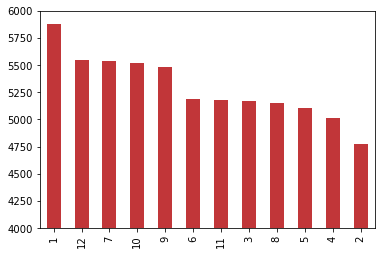

In [27]:
#to calculate calls by month
month_calls=SFOEMS['month'].value_counts().plot(kind='bar', grid=False)
plt.ylim(4000,6000)

In [21]:
#to calculate calls by season
month_calls=SFOEMS['Season'].value_counts().plot(kind='bar', grid=False)
plt.ylim(4000,6000)

TypeError: no numeric data to plot

(8000, 10000)

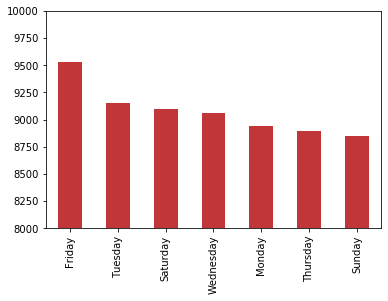

In [22]:
#to calculate calls by day of week
sns.set_palette('RdBu')
month_calls=SFOEMS['Incident day'].value_counts().plot(kind='bar', grid=False)
plt.ylim(8000,10000)

(8000, 10000)

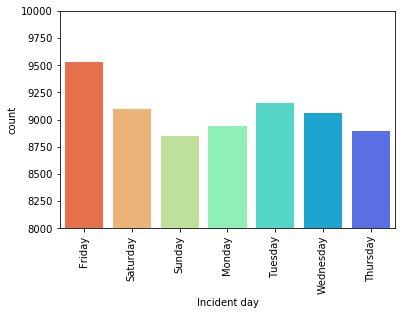

In [23]:
#to calculate number of calls by day - for staffing purposes
month_calls=sns.countplot(x='Incident day', data=SFOEMS, palette='rainbow_r')
plt.xticks(rotation=90)
plt.ylim(8000,10000)

In [31]:
#To create a dictionary of weekday vs. weekend
weekday_vs_weekend = {'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}
#print(weekday_vs_weekend)

#To add season column to df using append
SFOEMS['Day Type']=SFOEMS['Incident day'].map(weekday_vs_weekend)
SFOEMS.head(25)

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Season,Day Type
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market,1,NaN,Weekday
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,1,NaN,Weekday
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,1,NaN,Weekday
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1,NaN,Weekday
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1,NaN,Weekday
5,238 Eddy St 336,1/1/2016,Friday,1/1/2016,Friday,9:40:04,1/1/2016,9:49:09,1/1/2016,10:17:56,...,0,500,Service,"service call, other",n none,6.0,Tenderloin,1,NaN,Weekday
6,149 Mason St 708,1/1/2016,Friday,1/1/2016,Friday,15:20:52,1/1/2016,15:28:49,1/1/2016,16:27:12,...,0,500,Service,"service call, other",n none,6.0,Tenderloin,1,NaN,Weekday
7,736 Mission Street,1/1/2016,Friday,1/1/2016,Friday,16:31:46,1/1/2016,16:35:44,1/1/2016,16:51:24,...,0,700,False Alarm,"false alarm or false call, other",n none,6.0,Financial District/South Beach,1,NaN,Weekday
8,680 Mission Street,1/1/2016,Friday,1/1/2016,Friday,17:50:58,1/1/2016,17:56:03,1/1/2016,18:03:29,...,0,700,False Alarm,"false alarm or false call, other",n none,6.0,Financial District/South Beach,1,NaN,Weekday
9,171 2nd Street,1/1/2016,Friday,1/1/2016,Friday,0:35:02,1/1/2016,0:40:17,1/1/2016,0:53:24,...,0,710,False Alarm,"malicious, mischievous false call, other",n none,6.0,Financial District/South Beach,1,NaN,Weekday


In [24]:
zip_calls = pd.pivot_table(SFOEMS,values='Primary',index=['Category'], columns='Zipcode')
sns.heatmap(SFOEMS,cmap='YlGnBu')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#to map call type vs zip code
#corr=SFOEMS.corr()
#sns.heatmap(xticklabels=SFOEMS['Zipcode'], yticklabels=SFOEMS['Category'], cmap='icefire_r')
import seaborn.matrix as smatrix

sns.set()

#zip_calls = sns.load_dataset(SFOEMS)
SFOEMS = zip_calls.pivot("Zipcodes", "Category")
SFOEMS = flights.reindex(zip_calls.iloc[:12].month)

columns = [1953,1955]
myflights = flights.copy()
mask = myflights.columns.isin(columns)
myflights.loc[:, ~mask] = 0
arr = flights.values
vmin, vmax = arr.min(), arr.max()
sns.heatmap(myflights, annot=True, fmt="d", vmin=vmin, vmax=vmax)
plt.show()


#sns.set(style='ticks')
#x=SFOEMS['Zipcode']
#y=SFOEMS['Category']
#sns.jointplot(x,y, kind='hex', color='#4cb391')

#zip_calls = SFOEMS.pivot('Zipcode', 'Category')
#ax= sns.heatmap(zip_calls)

In [ ]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

In [ ]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

In [ ]:
#to calculate calls by day of week
sns.set(color_codes=True)
month_calls=SFOEMS['Zipcode'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [ ]:
#to take the top 4 zip codes from above chart

sns.set(color_codes=True)
month_calls=SFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [ ]:
sns.set(color_codes=True)
month_calls94103=SFOEMS['Zipcode']=='94103'
month_calls94103.head()
#month_calls94103=SFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [ ]:
# create a seperate dataframe for top 4 zipcodes - zip1: 94103
top_zip1= SFOEMS.loc[SFOEMS['Zipcode'] == 94103]
top_zip1.shape

In [ ]:
# create a seperate dataframe for top 4 zipcodes - zip2: 94102
top_zip2= SFOEMS.loc[SFOEMS['Zipcode'] == 94102]
top_zip2.shape

In [ ]:
# create a seperate dataframe for top 4 zipcodes - zip3: 94109
top_zip3= SFOEMS.loc[SFOEMS['Zipcode'] == 94109]
top_zip3.shape

In [ ]:
# create a seperate dataframe for top 4 zipcodes - zip4: 94110
top_zip4= SFOEMS.loc[SFOEMS['Zipcode'] == 94110]
top_zip4.shape

In [ ]:
zip1_count=sns.countplot(x='Category', data=top_zip1, palette='inferno')
plt.xticks(rotation=90)

In [ ]:
zip2_count=sns.countplot(x='Category', data=top_zip2, palette='rainbow')
plt.xticks(rotation=90)

In [ ]:
zip3_count=sns.countplot(x='Category', data=top_zip3, palette='inferno')
plt.xticks(rotation=90)

In [ ]:
zip4_count=sns.countplot(x='Category', data=top_zip4, palette='inferno')
plt.xticks(rotation=90)